In [324]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import os

In [325]:
#Looking at a single file, We have 12 months of data in seperate csv files
df = pd.read_csv("E:\Projects\Sales Analysis Pandas\Sales_Data\Sales_April_2019.csv")

#Listing all the csv files to concatenate as a single df
files = [file for file in os.listdir('E:\Projects\Sales Analysis Pandas\Sales_Data')]

#Creating a empty df to concatenate each month of sales data into one
year_data = pd.DataFrame()

#using pandas concat method to concatenate all the files
for file in files:
    df = pd.read_csv("E:/Projects/Sales Analysis Pandas/Sales_Data/" + file)
    year_data = pd.concat([year_data, df])

#saving the data as csv to check if everything is concatenated
#year_data.to_csv('year_data.csv', index = False)

# Reading and Understanding the Data

In [326]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [327]:
year_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [328]:
year_data.shape

(186850, 6)

In [329]:
year_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [330]:
year_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# <b>Data Preparations<b>
* Dropping unwanted columns and rows
* Renaming Columns
* Creating new featuresures

In [331]:
#Since we have 545 rows with empty data we will remove all such rows
year_data = year_data.dropna(how = 'all').copy()
year_data.shape

(186305, 6)

In [332]:
year_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [333]:
#Checking if all the date in order date column is correct
unique_dates = year_data['Order Date'].str[0:2].unique()
distinct_dates_df = pd.DataFrame({'dates': unique_dates})

distinct_dates_df.head(15000)

,dates
0,04
1,05
2,Or
3,08
4,09
5,12
6,01
7,02
8,03
9,07


In [334]:
#We have a row with a string value in the above data, we have to clear it out as it is a invalid date 
year_data = year_data[year_data['Order Date'] != 'Order Date']

In [335]:
#Checking if the invalid date row has been delete
unique_dates = year_data['Order Date'].str[0:2].unique()
distinct_dates_df = pd.DataFrame({'dates': unique_dates})

distinct_dates_df.head(15000)

,dates
0,04
1,05
2,08
3,09
4,12
5,01
6,02
7,03
8,07
9,06


In [336]:
#Adding a month column for analysis purposes and changing the type of it to int since it will be object
year_data['Month'] = year_data['Order Date'].str[0:2]
year_data['Month'] = year_data['Month'].astype('int32')

year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [337]:
#Converting the dtype of other columns to prevent future errors
year_data['Quantity Ordered'] = pd.to_numeric(year_data['Quantity Ordered'])
year_data['Price Each'] = pd.to_numeric(year_data['Price Each'])
year_data['Product'] = year_data['Product'].astype('str')

In [338]:
#Now adding the Total Sales amount for each order id
year_data['Sales Amount'] = year_data['Quantity Ordered'] * year_data['Price Each']

year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [339]:
#Adding a city and state column to calculate sales city wise
year_data['City'] = year_data['Purchase Address'].str.split(",").str[1]
year_data['State'] = year_data['Purchase Address'].str.split(",").str[2].str[1:3]

year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [340]:
#Converting Order date dtype to datetime
year_data['Order Date'] = pd.to_datetime(year_data['Order Date'])

C:\Users\sudha\AppData\Local\Temp\ipykernel_5160\3047967650.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  year_data['Order Date'] = pd.to_datetime(year_data['Order Date'])


In [341]:
year_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales Amount               float64
City                        object
State                       object
dtype: object

In [342]:
#creating a hour column to determine which hour is best for sales
year_data['Hour'] = year_data['Order Date'].dt.hour

year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City,State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9


# <b>Data Exploration + Answering Questions<b>

### Question 1: What was the best month of sale, How much was earned that month?

In [343]:
#Grouping the data and summing up the sales amount, as_index returns the ans as a df instead of series
monthly_sales = year_data.groupby('Month', as_index=False)['Sales Amount'].sum()
print(monthly_sales)

    Month  Sales Amount
0       1    1822256.73
1       2    2202022.42
2       3    2807100.38
3       4    3390670.24
4       5    3152606.75
5       6    2577802.26
6       7    2647775.76
7       8    2244467.88
8       9    2097560.13
9      10    3736726.88
10     11    3199603.20
11     12    4613443.34


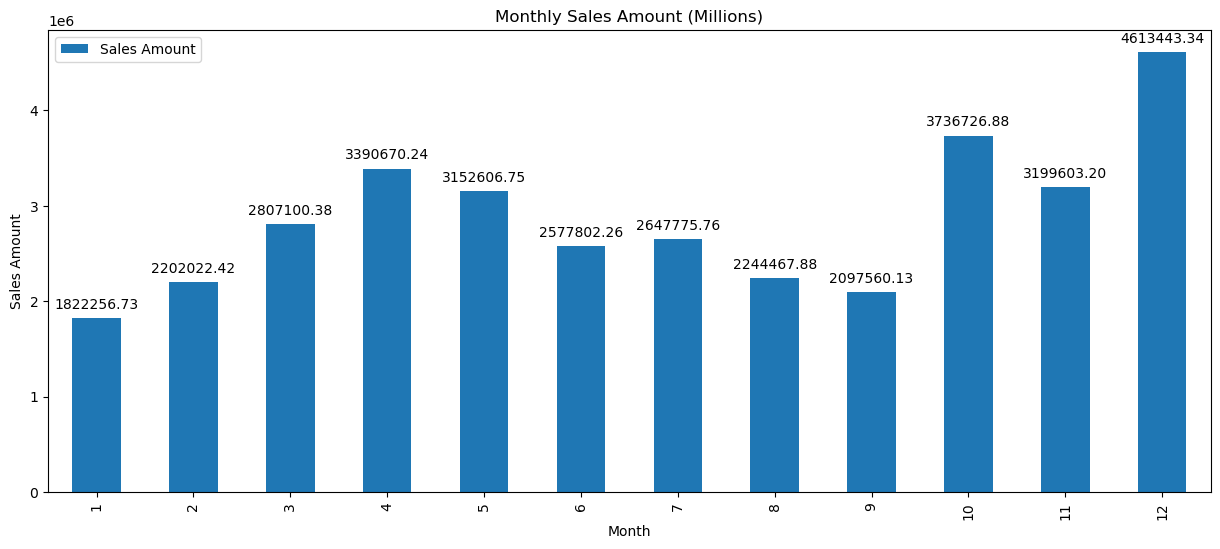

In [344]:
#Creating a bar plot to visualize the monthly sales
sales_plot = monthly_sales.plot(kind='bar', x='Month', y='Sales Amount', figsize=(15, 6))

#Adding the labels and title
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.title('Monthly Sales Amount (Millions)')

#Displaying the value of each bar
for index, value in enumerate(monthly_sales['Sales Amount']):
    plt.text(index, value + 100000, f'{value:.2f}', ha='center')

plt.show()

### Question 2: Which city sold the most product?

In [345]:
#Grouping the data with city and state as city names can repeat in diff states, and summing up the sales
citywise_sales = year_data.groupby(['City', 'State'], as_index = False)['Sales Amount'].sum()
citywise_sales.head(30)

,City,State,Sales Amount
0,Atlanta,GA,2795498.58
1,Austin,TX,1819581.75
2,Boston,MA,3661642.01
3,Dallas,TX,2767975.40
4,Los Angeles,CA,5452570.80
5,New York City,NY,4664317.43
6,Portland,ME,449758.27
7,Portland,OR,1870732.34
8,San Francisco,CA,8262203.91
9,Seattle,WA,2747755.48


Text(0.5, 1.0, 'Sales % of each City')

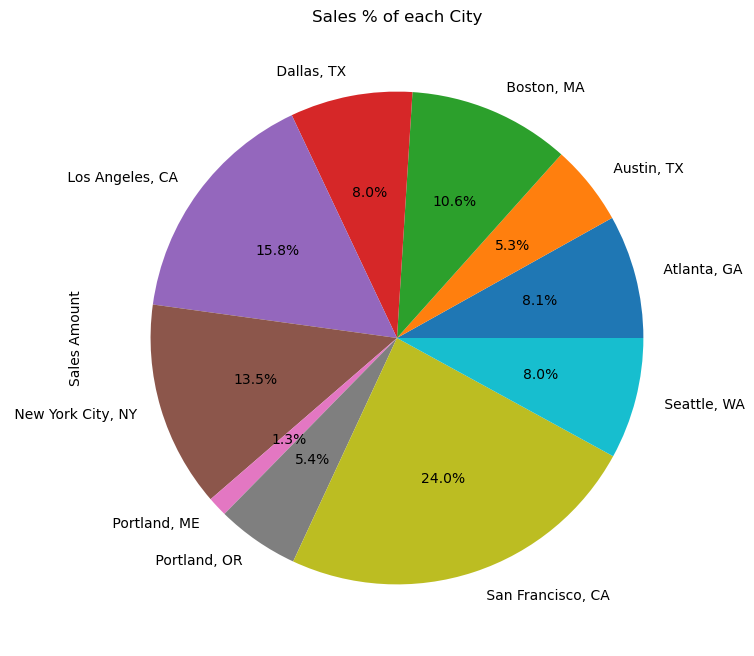

In [346]:
#Creating a pie chart and combining the city and state name as labels
citywise_plot = citywise_sales.plot(kind='pie', y='Sales Amount', labels=citywise_sales.apply(lambda x: f"{x['City']}, {x['State']}", axis=1), autopct='%1.1f%%', legend=None, figsize=(10, 8))
plt.title('Sales % of each City')

### Question 3: What is the best time to display ads to maximize reachability?

In [347]:
#Grouping the data by Hour and counting each sales
hourly_sales = year_data.groupby('Hour', as_index = False)['Sales Amount'].count()

#Renaming column from Sales Amount to Sale Count
hourly_sales.rename(columns = {'Sales Amount': 'Sale Count'}, inplace = True)
hourly_sales.head(50)

,Hour,Sale Count
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


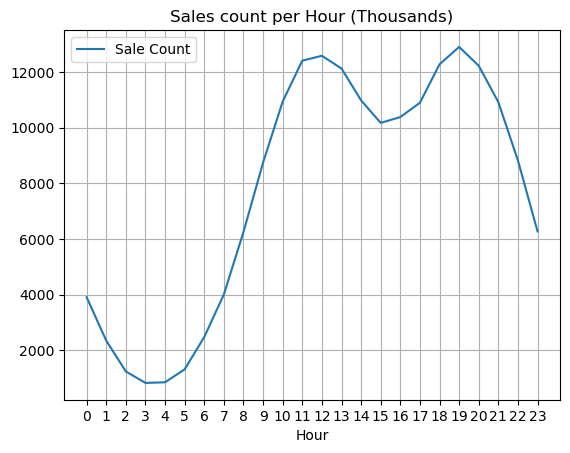

In [348]:
#Creating a line plot to see the change in sales by each hour
hourlysales_plot = hourly_sales.plot(kind = 'line', x = 'Hour', y='Sale Count')

#Now changing x-axis label to show for each hour
plt.xticks(hourly_sales['Hour'])
plt.title('Sales count per Hour (Thousands)')
plt.grid()

plt.show()

### Question 4: What were the products that sold most together?

In [349]:
#To find the products sold together, we retrieve all the duplicated Order IDs, keep = False keeps all the occurence including first
ordered_together = year_data[year_data['Order ID'].duplicated(keep = False)]

ordered_together.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City,State,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11


In [350]:
#Now we create a new column called grouped to put all the products with same id in a single column
ordered_together['Grouped'] = ordered_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

ordered_together.head()

C:\Users\sudha\AppData\Local\Temp\ipykernel_5160\2516807061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordered_together['Grouped'] = ordered_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City,State,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [351]:
#Now we just keeping the order id and grouped column and dropping the rest including the duplicated rows
ordered_together = ordered_together[['Order ID', 'Grouped']].drop_duplicates()

ordered_together.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [352]:
orderedTogetherCount = {}

for pair in ordered_together['Grouped']:
    key_pair = tuple(pair.split(',')[0:2])
    if key_pair in orderedTogetherCount:
        orderedTogetherCount[key_pair] += 1
    else:
        orderedTogetherCount[key_pair] = 1

In [353]:
from collections import Counter

#Using counter to retrieve the top 10 most ordered pair
counter = Counter()

counter.update(Counter(orderedTogetherCount))

counter.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1001),
 (('Google Phone', 'USB-C Charging Cable'), 984),
 (('iPhone', 'Wired Headphones'), 362),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 313),
 (('Google Phone', 'Wired Headphones'), 306),
 (('Google Phone', 'Bose SoundSport Headphones'), 185),
 (('Vareebadd Phone', 'Wired Headphones'), 107),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 64),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 55)]

### Question 5: What are products sold the most and why?

In [354]:
#Grouping data by products and summing up the quantity ordered
prodsell_qty = year_data.groupby('Product', as_index = False)['Quantity Ordered'].sum()

prodsell_qty.head()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


Text(0.5, 1.0, 'Quantity Ordered per Product')

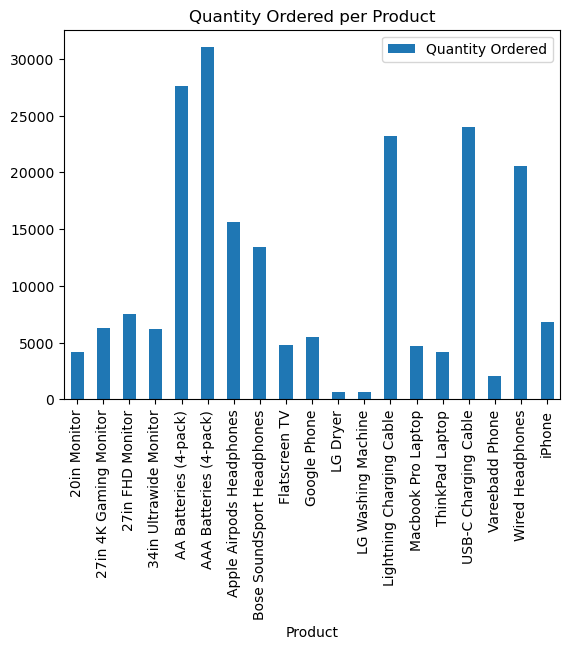

In [394]:
#Now using a bar chart to visualize
prodsell_plot = prodsell_qty.plot(kind = 'bar', x = 'Product', y = 'Quantity Ordered')
plt.title('Quantity Ordered per Product')

In [370]:
#Now to answer the question why, we overlay the bar with a pricing line plot to prove cheaper goods sell more
pricing = year_data.groupby('Product', as_index = False)['Price Each'].mean()
pricing.head()

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84


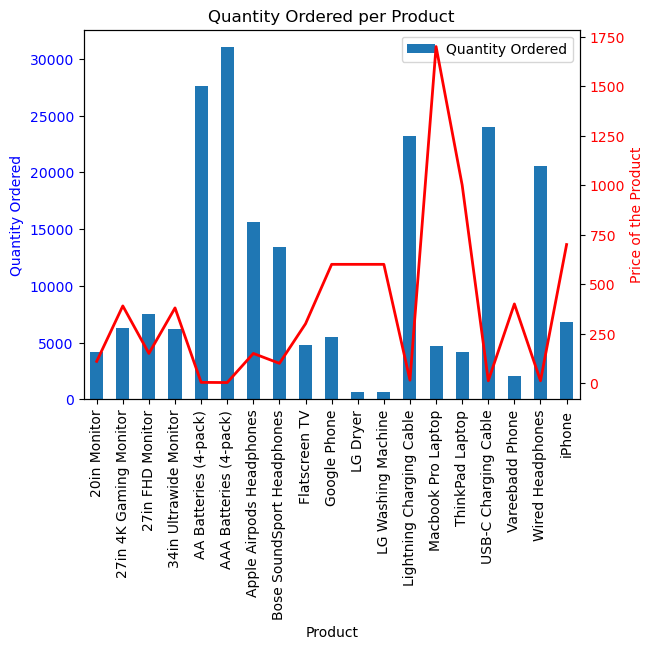

In [396]:
#Re-using the bar chart we created earlier
prodsell_plot = prodsell_qty.plot(kind = 'bar', x = 'Product', y = 'Quantity Ordered')
plt.title('Quantity Ordered per Product')

#Setting the label color and tick color for the left y-axis
plt.ylabel('Quantity Ordered', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

#twinx enables us to have secondary y-axis on the right side
plt.twinx() 

#Creating a line plot based on the price of each product
plt.plot(pricing['Product'], pricing['Price Each'], color='red', linewidth=2)

#Setting the label color for the secondary y-axis
plt.ylabel('Price of the Product', color='red')
plt.tick_params(axis='y', labelcolor='red')